# Results Performancetests 

This notebook contains the results of the conducted performancetests that were performed on IBM's serverless offering <b>"Code Engine"</b> im comparison to IBM's virtual server offering <b>"Virtual Server for VPC"</b>. 
The following tests were conducted:
- Baselintest
- Loadtest
- Stresstest

## Imports

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Salt Rounds Impact on Response Time

The tested API contains one endpoint in which as pre-defined passwort is <b>hashed</b> using NPM's hashing library "Bcrypt". The following chart shows the exponential growth of <b>required performance power</b> in relation to the amount of <b>salt rounds</b> chosen in the hashing function.

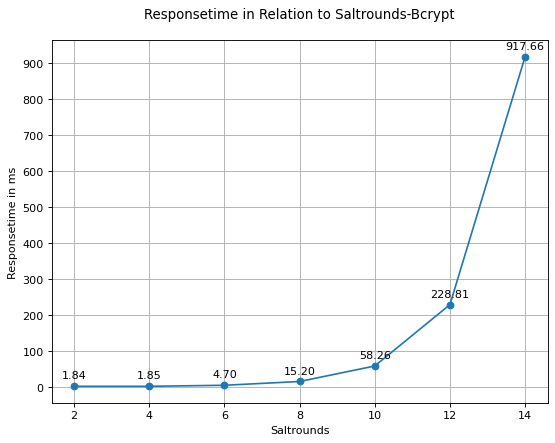

In [32]:
# DATA
x_salts = [2, 4, 6, 8, 10, 12, 14]
# These times were measures on my local MacBook Pro i5 dual core
y_res_time = [1.84, 1.85, 4.7, 15.2, 58.26, 228.81, 917.66]


# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.gca()
ax.set_yticks(numpy.arange(0, 1000, 100))
plt.plot(x_salts, y_res_time, marker = "o")
plt.xlabel("Saltrounds")
plt.ylabel("Responsetime in ms")
plt.title("Responsetime in Relation to Saltrounds-Bcrypt", pad=20)

for x,y in zip(x_salts, y_res_time):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0, 7), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.grid()
plt.show()

## Baseline Test

The Baseline Test configuration includes 150 Threads for a test duration of 30 minutes. The ramp-up period was set to 60s.

#### Total Successful HTTP Requests

[]

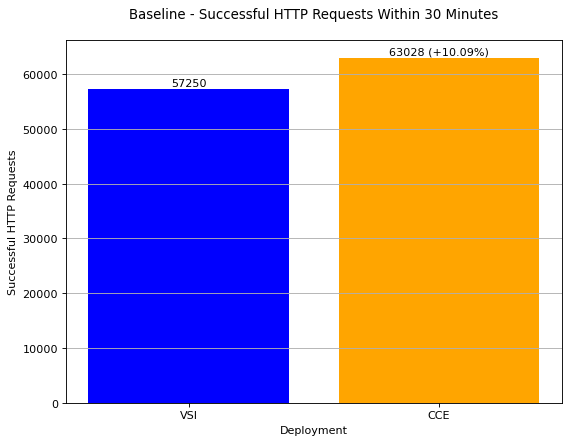

In [33]:
# DATA
# These numbers were taken from the aggregate report released by JMeter
total_successful_http_requests = [57250, 63028]

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
x1 = ["VSI", "CCE"]
ax = fig.gca()
plt.xlabel("Deployment")
plt.ylabel("Successful HTTP Requests")
plt.title("Baseline - Successful HTTP Requests Within 30 Minutes", pad=20)

for i, v in enumerate(total_successful_http_requests):
    text = v
    if i != 0:
        pair = [total_successful_http_requests[i], total_successful_http_requests[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / total_successful_http_requests[i-1]  * 100
        text = str(v) + " (+" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))
    
plt.grid(axis = "y")
ax.bar(x1, total_successful_http_requests, color=["blue", "orange"], align="center")
plt.plot()

#### Average Responetime

[]

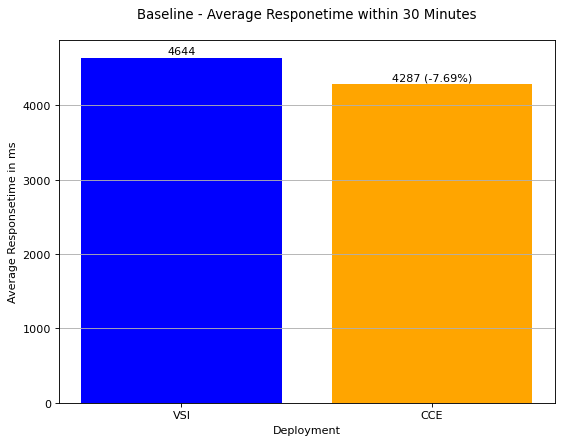

In [34]:
# DATA
# These numbers were taken from the aggregate report released by JMeter
average_response_times = [4644, 4287] #in ms

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
x1 = ["VSI", "CCE"]
ax = fig.gca()
plt.xlabel("Deployment")
plt.ylabel("Average Responsetime in ms")
plt.title("Baseline - Average Responetime within 30 Minutes", pad=20)

for i, v in enumerate(average_response_times):
    text = v
    if i != 0:
        pair = [average_response_times[i], average_response_times[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / average_response_times[i-1]  * 100
        text = str(v) + " (-" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))

plt.grid(axis = "y")
ax.bar(x1, average_response_times, color=["blue", "orange"], align="center")
plt.plot()

## Does the Public Internet Have an Influence on the Measurement?

To determine whether or not the public internet is an <b>non-neglectable variable</b> the baselinetest was repeated on the Virtual Server.
However, this time test test was initialised on the <b>same machine</b> that the API was deployed on. The test therefore contacted the API on localhost thereby eliminating the internet variable.

#### Localhost - Successful HTTP Requests

[]

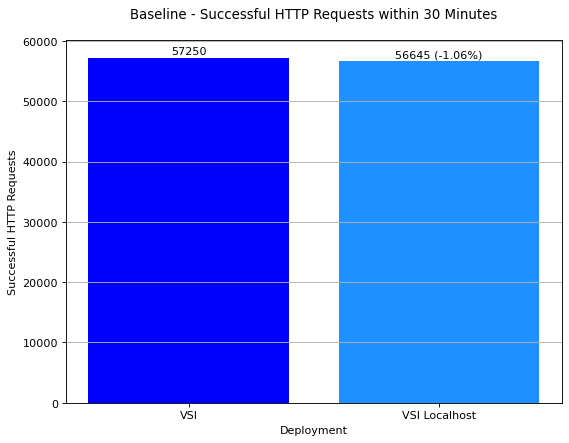

In [35]:
# DATA
# These numbers were taken from the aggregate report released by JMeter
total_successful_http_requests = [57250, 56645]

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
x1 = ["VSI", "VSI Localhost"]
ax = fig.gca()
plt.xlabel("Deployment")
plt.ylabel("Successful HTTP Requests")
plt.title("Baseline - Successful HTTP Requests within 30 Minutes", pad=20)

for i, v in enumerate(total_successful_http_requests):
    text = v
    if i != 0:
        pair = [total_successful_http_requests[i], total_successful_http_requests[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / total_successful_http_requests[i-1]  * 100
        text = str(v) + " (-" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))
    
plt.grid(axis = "y")
ax.bar(x1, total_successful_http_requests, color=["blue", "dodgerblue"], align="center")
plt.plot()

#### Localhost - Average Responsetime

[]

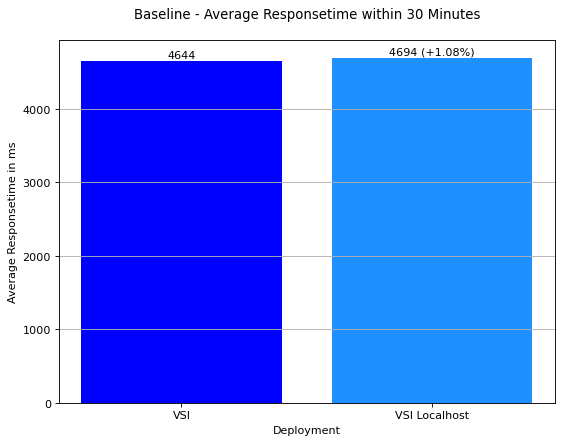

In [36]:
# DATA
# These numbers were taken from the aggregate report released by JMeter
average_response_times = [4644, 4694] #in ms

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
x1 = ["VSI", "VSI Localhost"]
ax = fig.gca()
plt.xlabel("Deployment")
plt.ylabel("Average Responsetime in ms")
plt.title("Baseline - Average Responsetime within 30 Minutes", pad=20)

for i, v in enumerate(average_response_times):
    text = v
    
    if i != 0:
        pair = [average_response_times[i], average_response_times[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / average_response_times[i-1]  * 100
        
        text = str(v) + " (+" + str(round(percentage, 2)) + "%)"
    
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))

plt.grid(axis = "y")
ax.bar(x1, average_response_times, color=["blue", "dodgerblue"], align="center")
plt.plot()

#### Spread of Datapoints in Baselinetest visualised using Boxplot

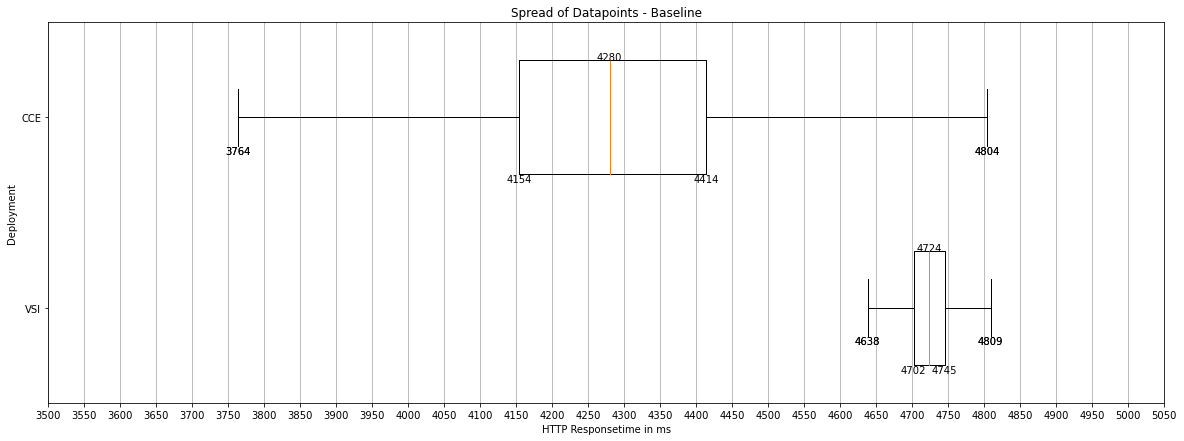

In [37]:
# DATA 
VSI_raw_data = pd.read_csv("./data/VSI/Baseline/Results.csv")
CCE_raw_data = pd.read_csv("./data/CCE/Baseline/Results.csv")
baseline_data_VSI = VSI_raw_data["elapsed"].values
baseline_data_CCE = CCE_raw_data["elapsed"].values

# PLOT
fig = plt.figure(figsize =(20, 7))
bp_dict = plt.boxplot([baseline_data_VSI, baseline_data_CCE], showfliers=False, labels=["VSI", "CCE"], vert=False, widths = 0.6)
ax = fig.gca()
ax.set_xticks(np.arange(3500, 5100, 50))

for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, int(x),
         horizontalalignment='center') # draw above, centered

for line in bp_dict['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x,y, int(x),
         horizontalalignment='center', # centered
         verticalalignment='top')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    plt.text(x,y, int(x),
         horizontalalignment='center', # centered
             verticalalignment='top')      # below

for line in bp_dict['caps']:
    x, y = line.get_xydata()[0]
    plt.text(x,y, int(x),
         horizontalalignment='center', # centered
         verticalalignment='top')
    x, y = line.get_xydata()[0]
    plt.text(x,y, int(x),
         horizontalalignment='center', # centered
         verticalalignment='top')
    
    
plt.grid(axis = "x")
plt.xlabel("HTTP Responsetime in ms")
plt.ylabel("Deployment")
plt.title("Spread of Datapoints - Baseline")
plt.show()

---

## Load Test

The Load Test configuration includes 500 Threads for a test duration of 30 minutes. The ramp-up period was set to 30 minutes.

#### Successful HTTP Requests

[]

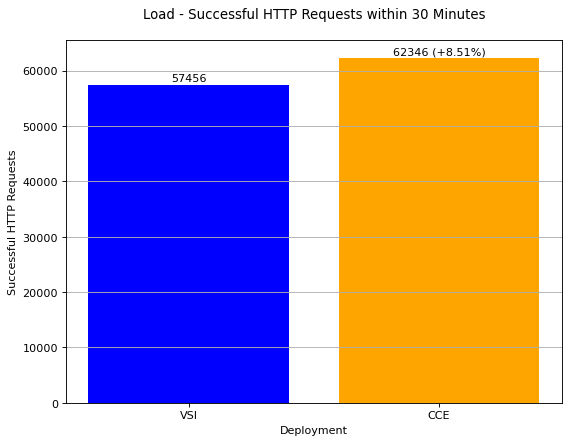

In [38]:
# DATA
# These numbers were taken from the aggregate report released by JMeter
total_successful_http_requests = [57456, 62346]

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
x1 = ["VSI", "CCE"]
ax = fig.gca()
plt.xlabel("Deployment")
plt.ylabel("Successful HTTP Requests")
plt.title("Load - Successful HTTP Requests within 30 Minutes", pad=20)

for i, v in enumerate(total_successful_http_requests):
    text = v
    if i != 0:
        pair = [total_successful_http_requests[i], total_successful_http_requests[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / total_successful_http_requests[i-1]  * 100
        text = str(v) + " (+" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))
    
plt.grid(axis = "y")
ax.bar(x1, total_successful_http_requests, color=["blue", "orange"], align="center")
plt.plot()

#### Average Responsetime

[]

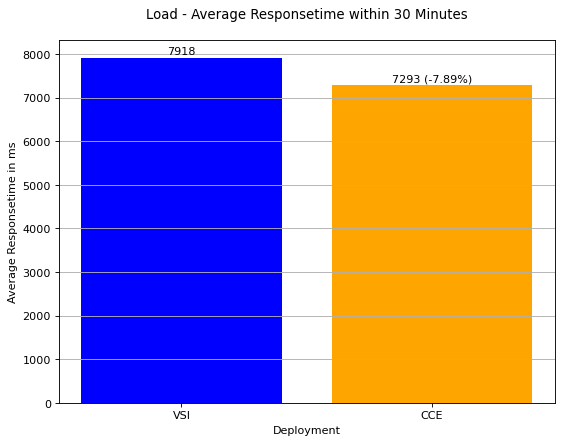

In [39]:
# DATA
# These numbers were taken from the aggregate report released by JMeter
average_response_times = [7918, 7293]

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
x1 = ["VSI", "CCE"]
ax = fig.gca()
plt.xlabel("Deployment")
plt.ylabel("Average Responsetime in ms")
plt.title("Load - Average Responsetime within 30 Minutes", pad=20)

for i, v in enumerate(average_response_times):
    text = v
    if i != 0:
        pair = [average_response_times[i], average_response_times[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / average_response_times[i-1]  * 100
        text = str(v) + " (-" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))

plt.grid(axis = "y")
ax.bar(x1, average_response_times, color=["blue", "orange"], align="center")
plt.plot()

#### Average Cost per  Additional Thread (User)

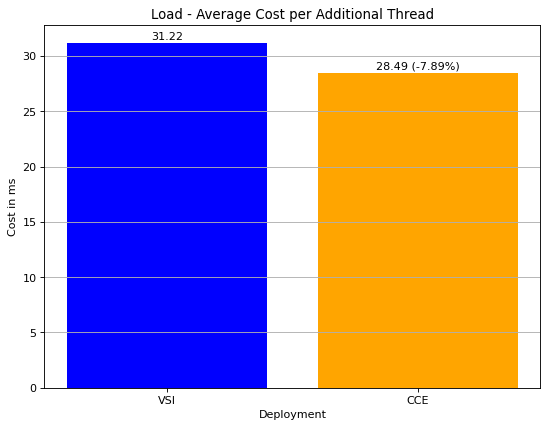

In [40]:
# DATA
load_data_CCE = pd.read_csv("./data/CCE/Load/Results.csv")
load_data_VSI = pd.read_csv("./data/VSI/Load/Results.csv")
slope_CCE, intercept_CCE = np.polyfit(load_data_CCE["allThreads"], load_data_CCE["elapsed"], 1)
slope_VSI, intercept_VSI = np.polyfit(load_data_VSI["allThreads"], load_data_VSI["elapsed"], 1)

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.bar(["VSI", "CCE"], [slope_VSI, slope_CCE], color=["blue", "orange"])
for i, v in enumerate([slope_VSI, slope_CCE]):
    text = round(v, 2)
    
    if i != 0:
        pair = [average_response_times[i], average_response_times[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / average_response_times[i-1]  * 100
        text = str(round(v, 2)) + " (-" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))

plt.grid(axis = "y")
plt.xlabel("Deployment")
plt.ylabel("Cost in ms")
plt.title("Load - Average Cost per Additional Thread")
plt.show()

## Stress Test

The Stress Test configuration includes 2000 Threads for a test duration of 45 minutes. The ramp-up period was set to 45 minutes.

#### Successful HTTP Requests

[]

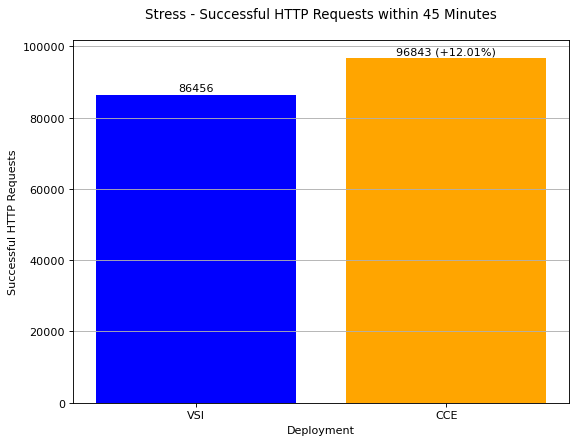

In [41]:
# DATA
total_successful_http_requests = [86456, 96843]

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
x1 = ["VSI", "CCE"]
ax = fig.gca()
plt.xlabel("Deployment")
plt.ylabel("Successful HTTP Requests")
plt.title("Stress - Successful HTTP Requests within 45 Minutes", pad=20)

for i, v in enumerate(total_successful_http_requests):
    text = v
    if i != 0:
        pair = [total_successful_http_requests[i], total_successful_http_requests[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / total_successful_http_requests[i-1]  * 100
        text = str(v) + " (+" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))

plt.grid(axis = "y")
ax.bar(x1, total_successful_http_requests, color=["blue", "orange"], align="center")
plt.plot()

#### Average Responsetime

[]

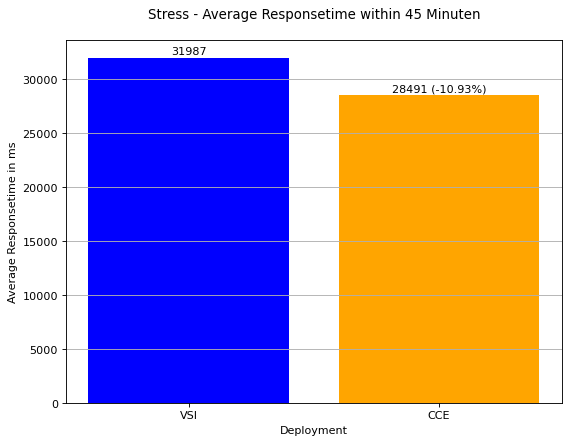

In [42]:
# DATA
average_response_times = [31987, 28491]

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
x1 = ["VSI", "CCE"]
ax = fig.gca()
plt.xlabel("Deployment")
plt.ylabel("Average Responsetime in ms")
plt.title("Stress - Average Responsetime within 45 Minuten", pad=20)

for i, v in enumerate(average_response_times):
    text = v
    if i != 0:
        pair = [average_response_times[i], average_response_times[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / average_response_times[i-1]  * 100
        text = str(v) + " (-" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))

plt.grid(axis = "y")
ax.bar(x1, average_response_times, color=["blue", "orange"], align="center")
plt.plot()

#### Linear Regression & Coefficient of Determination

Slope - CCE: 27.27636537482965
C - CCE: 1172.843928418144
Coefficient of Determination (R2) - CCE: 0.91250133756305
Slope - VSI: 30.824526811806066
C - VSI: 1255.3173462516352
Coefficient of Determination (R2) - VSI: 0.9130794100822851


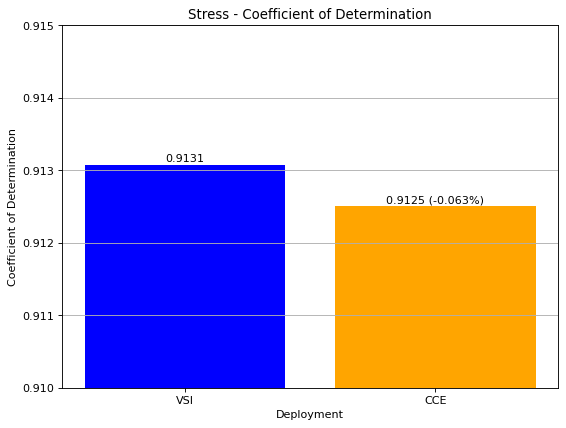

In [43]:
# DATA
stress_data_CCE_200 = pd.read_csv("./data/CCE/Stress/Concurrency _200/Results.csv")
stress_data_VSI = pd.read_csv("./data/VSI/Stress/Results.csv")

# CALCULATIONS
# CODE ENGINE
from scipy.stats import linregress
from sklearn.metrics import r2_score
m_CCE, c_CCE, r_CCE, p_CCE, std_CCE = linregress(stress_data_CCE_200["allThreads"], y=stress_data_CCE_200["elapsed"])

# Line equation mx + c => 27.27 * x + 1172.84
print("Slope - CCE:", m_CCE)
print("C - CCE:", c_CCE)
line_equation_CCE = lambda x: m_CCE * x + c_CCE

# Calculate the predicated data points
stress_data_CCE_200["predicted_elapsed"] = stress_data_CCE_200["allThreads"].apply(line_equation_CCE)

# Calculation R2
r2_CCE = r2_score(stress_data_CCE_200["elapsed"], stress_data_CCE_200["predicted_elapsed"])
print("Coefficient of Determination (R2) - CCE:", r2_CCE)

# VIRTUAL SERVER
m_VSI, c_VSI, r_VSI, p_VSI, std_VSI = linregress(stress_data_VSI["allThreads"], y=stress_data_VSI["elapsed"])

# Line equation mx + c => 27.27 * x + 1172.84
print("Slope - VSI:", m_VSI)
print("C - VSI:", c_VSI)
line_equation_VSI = lambda x: m_VSI * x + c_VSI

# Calculate the predicated data points
stress_data_VSI["predicted_elapsed"] = stress_data_VSI["allThreads"].apply(line_equation_VSI)

# Berechnung Bestimmtheitsmaß R2
r2_VSI = r2_score(stress_data_VSI["elapsed"], stress_data_VSI["predicted_elapsed"])
print("Coefficient of Determination (R2) - VSI:", r2_VSI)

fig = plt.figure(figsize=(8, 6), dpi=80)
for i, v in enumerate([r2_VSI, r2_CCE]):
    text = round(v, 4)
    
    if i != 0:
        pair = [r2_VSI, r2_CCE]
        difference = max(pair) - min(pair)
        percentage = difference / pair[i-1]  * 100
        text = str(round(v, 4)) + " (-" + str(round(percentage, 3)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))
    
ax = fig.gca()
ax.set_ylim([0.91, 0.915])
ax.set_yticks(np.arange(0.91, 0.915, 0.001))
plt.xlabel("Deployment")
plt.ylabel("Coefficient of Determination")
plt.bar(["VSI", "CCE"], [r2_VSI, r2_CCE], color=["blue", "orange"])
plt.title("Stress - Coefficient of Determination")
plt.grid(axis = "y")

#### Amount of Unexplained HTTP Requests (Calculated using R2)

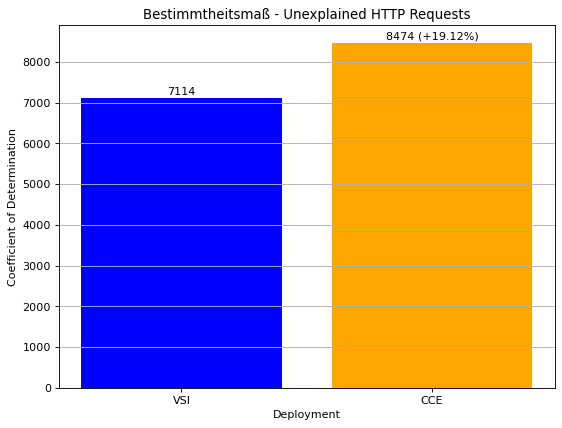

In [44]:
# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
for i, v in enumerate([7114, 8474]):
    text = round(v, 4)
    
    if i != 0:
        pair = [7114, 8474]
        difference = max(pair) - min(pair)
        percentage = difference / pair[i-1]  * 100
        
        text = str(round(v, 4)) + " (+" + str(round(percentage, 2)) + "%)"
    
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))
plt.xlabel("Deployment")
plt.ylabel("Coefficient of Determination")
plt.bar(["VSI", "CCE"], [7114, 8474], color=["blue", "orange"])
plt.title("Bestimmtheitsmaß - Unexplained HTTP Requests")
plt.grid(axis = "y")

#### Average Additional Cost per Thread (User)

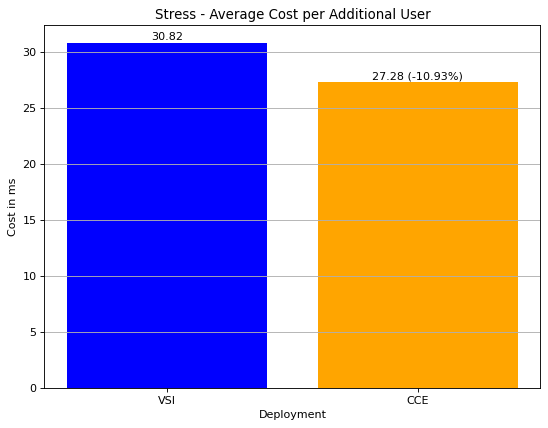

In [45]:
# DATA
slope_CCE, intercept_CCE = np.polyfit(stress_data_CCE_200["allThreads"], stress_data_CCE_200["elapsed"], 1)
slope_VSI, intercept_VSI = np.polyfit(stress_data_VSI["allThreads"], stress_data_VSI["elapsed"], 1)

# PLOT
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.bar(["VSI", "CCE"], [slope_VSI, slope_CCE], color=["blue", "orange"])

for i, v in enumerate([slope_VSI, slope_CCE]):
    text = round(v, 2)
    if i != 0:
        pair = [average_response_times[i], average_response_times[i-1]]
        difference = max(pair) - min(pair)
        percentage = difference / average_response_times[i-1]  * 100
        text = str(round(v, 2)) + " (-" + str(round(percentage, 2)) + "%)"
    plt.annotate(text, (i, v), ha="center", textcoords="offset points", xytext=(0, 3))


plt.grid(axis = "y")
plt.xlabel("Deployment")
plt.ylabel("Cost in ms")
plt.title("Stress - Average Cost per Additional User")
plt.show()